In [1]:
@everywhere include("../Source/ChiralMC.jl")
@everywhere using ChiralMC

In [2]:
@everywhere include("../Source/functions_msc.jl")
@everywhere include("../Source/functions_observables.jl")
@everywhere include("../Source/functions_parallel.jl")
include("../Source/functions_plots_and_files.jl")

initializeTwoStatesS (generic function with 1 method)

In [3]:
@everywhere const two_pi = 2π

# We run a simulation with the parameters
g = 0.3    # Gauge coupling
ν = 0.3    # Anisotropy
H = -0.72   # External field

# Other parameters
L = 32     # System length
T = 0.4   # Temperature
γ = 1.0    # Order parameter amplitud

# Calculate periodic boundary conditioned f s.t. fL ∈ N
f = ceil(abs(H/(2π)*L))/L*sign(H)
# Calculate inverse temperature
β = 1/T

# Create system
syst = SystConstants(L, γ, 1/g^2, ν, f, β)
sim = Controls(π/3, 0.4, 3.0)

# Measurement parameters
M = 300    # Number of measurements
Δt = 200  # Interval between measurements (MCS)
# Construct k-matrix where the horizontal axis contains kx ∈ [-π, π), while
# the vertical axis contain ky ∈ [-π, π) at the second component
k_matrix = [[2π/L*(x-1-L/2), 2π/L*(L/2-y)] for y=1:L, x=1:L];

Finding Equilibrium of
ChiralMC.SystConstants(32, 1.0, 11.11111111111111, 0.3, -0.125, 2.5)
ChiralMC.Controls(1.0471975511965976, 0.4, 3.0)
Performing initial 1000 MCS
Searching for ΔE <= 0..
ΔE <= 0 found at t₀ = 2021!
Checking if average is close to 0..
0% of max
Equilibrium found at time 12274
over the interval [2021, 2274]
s.t. <ΔE> = 10.79 ± 1.5
std(ΔE) = 24.5


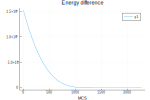

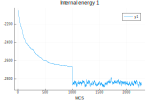

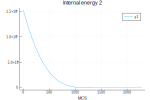

Performing extra MCS
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Calculating energies and acceptance rates


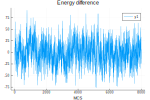

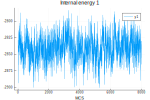

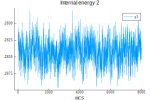

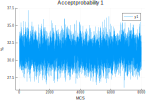

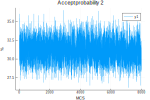

In [4]:
(ψ₁, sim₁, ψ₂, sim₂, t₀) = initializeTwoStates(syst, sim);

# Motivation

Since we so far don't have parallelized the mc-update, then much time is wasted thermalizing the system since this has to be done on a single cpu. Therefore it is better to use a cpu with higher frequency than what is found on Vilje and other supercomputers. The plan is to have a julia script prepare a folder for each system we want to measure. The folder should contain a file giving the system parameters as before, as well as two saved states that are the final states after thermalizing. As well as a file giving the thermalization time. This will also eliminate the need to re-equilibrate a system that is already equilibrated where we want to do new measurements.

### Moving to work directory

In [5]:
pwd()

"/home/nicolai/Documents/Work/PhD/Numerikk/MC/finite-temp-vortex-lattice/Notebooks"

In [7]:
for x=1:10, y=1:10
    println((x,y))
end

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(9, 10)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
